# SGD Algorithm to predict movie ratings</font>

<b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<font color='red'> Reading the csv file </font>

In [ ]:
shared_drive/aaic/Recom

In [3]:
import pandas as pd
import sqlite3
data=pd.read_csv('shared_drive/aaic/RecommendationSystem_TruncatedSVD/ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [4]:
data.shape

(89992, 3)

<font color='red'>Create your adjacency matrix </font>

In [6]:
from scipy.sparse import csr_matrix
from scipy.sparse import vstack
adjacency_matrix = csr_matrix((data.rating,(data.user_id.values,data.item_id.values)))

In [7]:
adjacency_matrix.shape

(943, 1681)

<font color='cyan'>Grader function - 1</font>

In [8]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

**The unique items in the given csv file are 1662 only . But the id's vary from 0-1681 but they are not continuous and hence 
you'll get matrix of size 943x1681.**

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [9]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [10]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=60,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 60)
(60,)
(1681, 60)


<font color='red'>Compute mean of ratings</font>

In [11]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.

    return ratings.mean()

In [12]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [13]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [14]:
import numpy as np

def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros np.zeros(())
    return np.zeros((dim))

In [15]:
dim= 943  # give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [16]:
dim= 1681 # give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

<font color='cyan'>Grader function -3 </font>

In [17]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='red'>Compute dL/db_i</font>

In [18]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha,b_i):
    '''In this function, we will compute dL/db_i'''

    return alpha*2*b_i-2*(rating-mu-b_i-np.dot(U[user_id],V.T[item_id]))

<font color='cyan'>Grader function -4 </font>

In [19]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha,b_i=0)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [20]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha,c_j):
    '''In this function, we will compute dL/dc_j'''
    return alpha*2*c_j-2*(rating-mu-c_j-np.dot(U[user_id],V.T[item_id]))

<font color='cyan'>Grader function - 5 </font>

In [21]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu,alpha,c_j=0)
print(value)
grader_dc(value)

-2.9290787114434913


True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [22]:
def predict_y(mu,b_i,c_j,ui,vj):
    return mu+b_i+c_j+np.dot(ui,vj)

In [23]:
scores=[]
alpha = 0.01
learning_rate = 0.001
epoch=30
for i in range(epoch):
    mse=0
    for user,item,rat in zip(data.user_id.values,data.item_id.values,data.rating.values):
        #mse+=(rat-predict_y(mu,b_i[user],c_j[item],U[user],VT.T[item]))**2
        b_i[user] = b_i[user] - learning_rate * derivative_db(user,item,rat,U,VT,mu,alpha,b_i[user])
        c_j[item] =  c_j[item] - learning_rate * derivative_dc(user,item,rat,U,VT,mu,alpha,c_j[item])
        mse+=(rat-predict_y(mu,b_i[user],c_j[item],U[user],VT.T[item]))**2
    scores.append(mse/len(data))
    print('MSE : {}'.format(mse/len(data)))

MSE : 1.1401541061441076
MSE : 1.0236721250732004
MSE : 0.971110487867714
MSE : 0.9420127588824366
MSE : 0.9238966956489952
MSE : 0.91168222335324
MSE : 0.9029504200264233
MSE : 0.8964244105363964
MSE : 0.8913761783324233
MSE : 0.8873641862905467
MSE : 0.8841065379839723
MSE : 0.8814152684631912
MSE : 0.8791603086546191
MSE : 0.8772487410162118
MSE : 0.8756123433875603
MSE : 0.8741998264948876
MSE : 0.8729718341564312
MSE : 0.8718976264865418
MSE : 0.8709528204542659
MSE : 0.8701178134769489
MSE : 0.8693766595336341
MSE : 0.8687162520718429
MSE : 0.8681257193479484
MSE : 0.867595969741841
MSE : 0.8671193448525699
MSE : 0.866689351329995
MSE : 0.866300451094532
MSE : 0.8659478954564066
MSE : 0.8656275926607992
MSE : 0.8653360011796907


<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

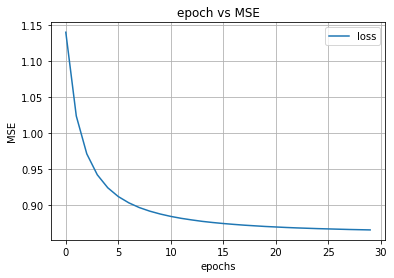

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(epoch),np.array(scores).round(4),label='loss')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.grid()
plt.title('epoch vs MSE')
plt.legend()
plt.show()

<br>

Logistic regression 

In [48]:
user_data=pd.read_csv('shared_drive/aaic/RecommendationSystem_TruncatedSVD/user_info.csv.txt')

In [49]:
user_data.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [50]:
X=U
y=user_data['is_male'].values

In [51]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV,train_test_split

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=10)

In [67]:
model=SGDClassifier(loss='log',random_state=23)
paras={'alpha':[0.00001,0.001,0.01,0.1,1,10,100]}
clf=GridSearchCV(model,param_grid=paras,scoring='roc_auc',return_train_score=True,cv=10)

In [68]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(loss='log', random_state=23),
             param_grid={'alpha': [1e-05, 0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='roc_auc')

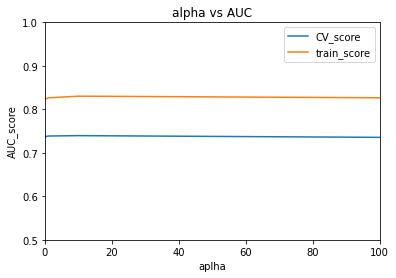

In [69]:
plt.plot(paras['alpha'],clf.cv_results_['mean_test_score'],label='CV_score')
plt.plot(paras['alpha'],clf.cv_results_['mean_train_score'],label='train_score')
plt.legend()
plt.title('alpha vs AUC')
plt.xlabel('aplha')
plt.ylabel('AUC_score')
plt.xlim(0,100)
plt.ylim(0.5,1)
plt.show()

In [70]:
best_model=clf.best_estimator_
best_model.fit(X_train,y_train)

SGDClassifier(alpha=10, loss='log', random_state=23)

In [71]:
print("Accuracy on train_data {}".format(best_model.score(X_train,y_train))) #imbalanced Dataset
print("Accuracy on test_data {}".format(best_model.score(X_test,y_test)))

Accuracy on train_data 0.71004243281471
Accuracy on test_data 0.711864406779661


In [83]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,auc
from seaborn import heatmap

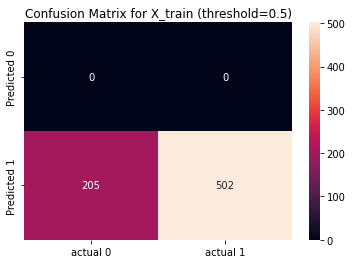

In [73]:
y_pred=best_model.predict(X_train)
temp=pd.DataFrame(confusion_matrix(y_train,y_pred).T,index=['Predicted 0','Predicted 1'],columns=['actual 0','actual 1'])
heatmap(temp,annot=True,fmt='g')
plt.title('Confusion Matrix for X_train (threshold=0.5)')
plt.show()

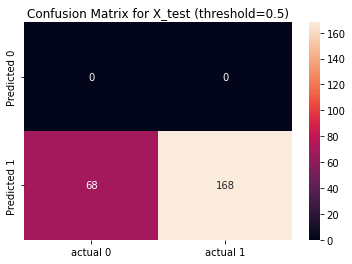

In [74]:
y_pred=best_model.predict(X_test)
temp=pd.DataFrame(confusion_matrix(y_test,y_pred).T,index=['Predicted 0','Predicted 1'],columns=['actual 0','actual 1'])
heatmap(temp,annot=True,fmt='g')
plt.title('Confusion Matrix for X_test (threshold=0.5)')
plt.show()

In [100]:
y_pred=best_model.predict_proba(X_train)
print("AUC score on X_train data set is {} ".format(roc_auc_score(y_train,y_pred[:,1])))
y_pred=best_model.predict_proba(X_test)
print('AUC score on X_test data set is {} '.format(roc_auc_score(y_test,y_pred[:,1])))

AUC score on X_train data set is 0.8303080361480906 
AUC score on X_test data set is 0.7436974789915967 


In [101]:
y_pred=best_model.predict_proba(X_train)
fpr,tpr,thre=roc_curve(y_train,y_pred.T[1])

In [102]:
best_threshold=thre[np.argmax(tpr*(1-fpr))]

In [103]:
def best_thre(x,t):
    return list(map(lambda x:1 if x>=t else 0,x.T[1]))

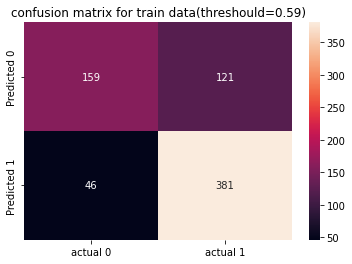

In [104]:
y_pred=best_model.predict_proba(X_train)
y_pred=best_thre(y_pred,best_threshold)
train_cm=pd.DataFrame(confusion_matrix(y_train,y_pred).T,index=['Predicted 0','Predicted 1'],columns=['actual 0','actual 1'])
heatmap(train_cm,annot=True,fmt='g')
plt.title('confusion matrix for train data(threshould={})'.format(round(best_threshold,2)))
plt.show()

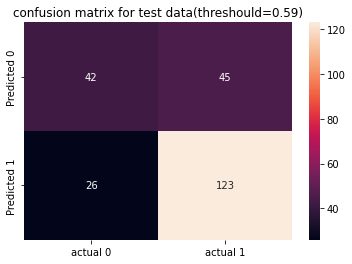

In [105]:
y_pred=best_model.predict_proba(X_test)
y_pred=best_thre(y_pred,best_threshold)
train_cm=pd.DataFrame(confusion_matrix(y_test,y_pred).T,index=['Predicted 0','Predicted 1'],columns=['actual 0','actual 1'])
heatmap(train_cm,annot=True,fmt='g')
plt.title('confusion matrix for test data(threshould={})'.format(round(best_threshold,2)))
plt.show()

by using decomposed U matrix we got AUC score 0.74 using logistic regression model